<a href="https://colab.research.google.com/github/fshamsham/fuelpricemsia/blob/main/(WS)_Fuel_Price_Trends_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Fuel Price Trends in Malaysia (2017 - 2024)**

![petrol](https://drive.usercontent.google.com/download?id=1H8d63-IqPCGzhX85GAXXmmvc3TWqwxvg)

The Malaysian government regulates fuel prices, including RON95, RON97 and diesel, based on various factors such as global oil prices, currency exchange rates and economic policies. These fuel prices affect not only individuals and businesses but also play a crucial role in the cost of transportation, logistics and the broader economy.

For this analysis, you have been provided with a dataset containing weekly retail prices of RON95, RON97 and diesel in both **Peninsular Malaysia (West Malaysia)** and **East Malaysia**. The dataset spans from April 2017 to September 2024 and captures both the **actual fuel prices** and the **weekly changes**.

Your goal is to understand and visualize the trends and fluctuations in fuel prices over time, identify any patterns or significant events, and compare prices between regions and fuel types. The analysis will provide insights into how fuel prices have evolved over the years.


#### **Objectives:**

1. **Track Price Trends:** Analyze how the prices of RON95, RON97, and diesel have fluctuated over time.
2. **Price Comparisons**: Compare the prices of RON95 vs RON97, and investigate the difference in diesel prices between West and East Malaysia.
3. **Identify Anomalies**: Identify significant price jumps or drops and the possible reasons behind them.
4. **Cumulative Changes**: Calculate the cumulative price change for each fuel type from 2017 to 2024.


**Data Source:** https://data.gov.my/data-catalogue/fuelprice

## **Data Collection**

In [2]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/commodities/fuelprice.parquet'

fuelprice_df = pd.read_parquet(URL_DATA)
if 'date' in fuelprice_df.columns: fuelprice_df['date'] = pd.to_datetime(fuelprice_df['date'])

print(fuelprice_df)

       series_type       date  ron95  ron97  diesel  diesel_eastmsia
0            level 2017-03-30   2.13   2.41    2.11             2.11
1            level 2017-04-06   2.16   2.43    2.08             2.08
2            level 2017-04-13   2.24   2.52    2.16             2.16
3            level 2017-04-20   2.27   2.54    2.21             2.21
4            level 2017-04-27   2.21   2.49    2.14             2.14
..             ...        ...    ...    ...     ...              ...
746  change_weekly 2024-08-29   0.00  -0.05   -0.05             0.00
747  change_weekly 2024-09-05   0.00  -0.02   -0.02             0.00
748  change_weekly 2024-09-12   0.00  -0.15   -0.15             0.00
749  change_weekly 2024-09-19   0.00  -0.06   -0.06             0.00
750  change_weekly 2024-09-26   0.00   0.00    0.00             0.00

[751 rows x 6 columns]


## **Data Understanding**

**Dataset description**

Weekly retail prices of RON95 petrol, RON97 petrol, and diesel in Malaysia.

**Variable definitions**

|Name in Dataset|Variable|Definition|
|--- |--- |--- |
| series_type (categorical) | `Chart Type` | Price in RM (level), or weekly change in RM (change_weekly).|
| date (Date) | `Date` | The date of effect of the price, in YYYY-MM-DD format. |
| ron95 (Float) | `RON95 Petrol Price` | Price per litre of RON95 petrol, in RM. |
| ron97 (Float) | `RON97 Petrol Price` | Price per litre of RON97 petrol, in RM.|
| diesel (Float) | `Price of Diesel (Peninsular Malaysia)` | Price per litre of diesel in Peninsular Malaysia, in RM.|
| diesel_eastmsia (Float) | `Price of Diesel (East Malaysia)` | Price per litre of diesel in East Malaysia, in RM.|

In [3]:
fuelprice_df.head()

,series_type,date,ron95,ron97,diesel,diesel_eastmsia
0,level,2017-03-30,2.13,2.41,2.11,2.11
1,level,2017-04-06,2.16,2.43,2.08,2.08
2,level,2017-04-13,2.24,2.52,2.16,2.16
3,level,2017-04-20,2.27,2.54,2.21,2.21
4,level,2017-04-27,2.21,2.49,2.14,2.14


In [4]:
# Inspect Basic Information
print("Basic Info:")
print(fuelprice_df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   series_type      751 non-null    object        
 1   date             751 non-null    datetime64[ns]
 2   ron95            751 non-null    float64       
 3   ron97            751 non-null    float64       
 4   diesel           751 non-null    float64       
 5   diesel_eastmsia  751 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 35.3+ KB
None


In [5]:
# Check number of rows and columns
fuelprice_df.shape

(751, 6)

In [6]:
# Check for missing values
fuelprice_df.isnull().sum()

,0
series_type,0
date,0
ron95,0
ron97,0
diesel,0
diesel_eastmsia,0


In [7]:
# Statistics about numeric columns
fuelprice_df.describe()

,date,ron95,ron97,diesel,diesel_eastmsia
count,751,751.000000,751.000000,751.000000,751.000000
mean,2021-02-07 18:58:57.683089408,1.012570,1.444301,1.077909,1.052037
min,2017-03-30 00:00:00,-0.380000,-0.360000,-0.170000,-0.170000
25%,2019-05-11 00:00:00,0.000000,0.000000,0.000000,0.000000
50%,2021-03-04 00:00:00,1.250000,1.550000,1.400000,1.400000
75%,2022-12-18 12:00:00,2.050000,2.670000,2.150000,2.150000
max,2024-09-26 00:00:00,2.380000,4.840000,3.350000,2.340000
std,NaN,1.020615,1.520903,1.094831,1.057061


In [8]:
# Frequency counts for 'series_type' (Categorical variable)
fuelprice_df['series_type'].value_counts()

,count
series_type,
level,376
change_weekly,375


## **Data Preparation**

In [9]:
# Filter the data for 'level' series_type only (to focus on actual prices, not weekly changes)
fuelprice_df_level = fuelprice_df[fuelprice_df['series_type'] == 'level']
fuelprice_df_level.head()

,series_type,date,ron95,ron97,diesel,diesel_eastmsia
0,level,2017-03-30,2.13,2.41,2.11,2.11
1,level,2017-04-06,2.16,2.43,2.08,2.08
2,level,2017-04-13,2.24,2.52,2.16,2.16
3,level,2017-04-20,2.27,2.54,2.21,2.21
4,level,2017-04-27,2.21,2.49,2.14,2.14


In [10]:
# Separate the data based on 'series_type' == 'change_weekly'
fuelprice_df_weekly_change = fuelprice_df[fuelprice_df['series_type'] == 'change_weekly']
fuelprice_df_weekly_change.head()

,series_type,date,ron95,ron97,diesel,diesel_eastmsia
376,change_weekly,2017-04-06,0.03,0.02,-0.03,-0.03
377,change_weekly,2017-04-13,0.08,0.09,0.08,0.08
378,change_weekly,2017-04-20,0.03,0.02,0.05,0.05
379,change_weekly,2017-04-27,-0.06,-0.05,-0.07,-0.07
380,change_weekly,2017-05-04,-0.10,-0.10,-0.06,-0.06


## **Data Analysis**

## **Show the latest fuel price**

In [11]:
fuelprice_df_level.tail(1)

,series_type,date,ron95,ron97,diesel,diesel_eastmsia
375,level,2024-09-26,2.05,3.19,2.95,2.15


In [12]:
# Get the latest fuel prices
latest_price = fuelprice_df_level.iloc[-1]
latest_price

,375
series_type,level
date,2024-09-26 00:00:00
ron95,2.05
ron97,3.19
diesel,2.95
diesel_eastmsia,2.15


### Price Trend Over Time: How have the prices of RON95, RON97, and diesel changed from 2017 to 2024?

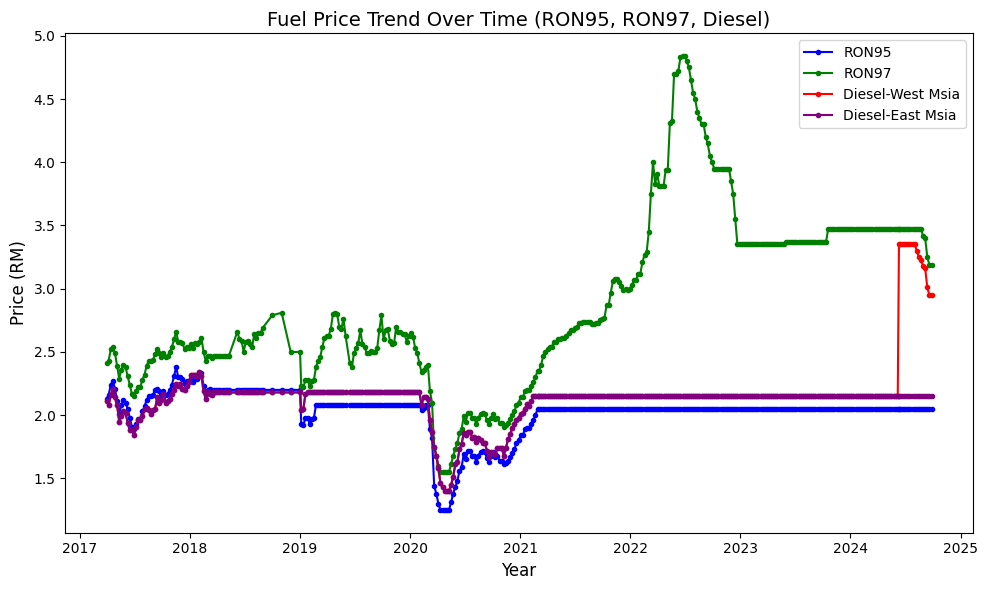

In [26]:
import matplotlib.pyplot as plt

# Plotting the price trends
plt.figure(figsize=(10, 6))

# Plotting RON95, RON97, and Diesel prices
plt.plot(fuelprice_df_level['date'], fuelprice_df_level['ron95'], label='RON95', marker='.', color='blue')
plt.plot(fuelprice_df_level['date'], fuelprice_df_level['ron97'], label='RON97', marker='.', color='green')
plt.plot(fuelprice_df_level['date'], fuelprice_df_level['diesel'], label='Diesel-West Msia', marker='.', color='red')
plt.plot(fuelprice_df_level['date'], fuelprice_df_level['diesel_eastmsia'], label='Diesel-East Msia', marker='.', color='purple')

# Adding title and labels
plt.title('Fuel Price Trend Over Time (RON95, RON97, Diesel)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)

# Adding a legend
plt.legend() # using a size in points

# Rotating date labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# filter the data to include only 2020 and 2021
df_filtered = fuelprice_df_level[(fuelprice_df_level['date'] >= '2020-01-01') & (fuelprice_df_level['date'] <= '2020-12-31')]
df_filtered


,series_type,date,ron95,ron97,diesel,diesel_eastmsia
127,level,2020-01-04,2.08,2.65,2.18,2.18
128,level,2020-01-11,2.08,2.62,2.18,2.18
129,level,2020-01-18,2.08,2.53,2.18,2.18
130,level,2020-01-25,2.08,2.49,2.18,2.18
131,level,2020-02-01,2.08,2.41,2.18,2.18
132,level,2020-02-08,2.04,2.34,2.08,2.08
133,level,2020-02-15,2.06,2.36,2.14,2.14
134,level,2020-02-22,2.08,2.38,2.14,2.14
135,level,2020-02-29,2.08,2.40,2.13,2.13
136,level,2020-03-07,1.89,2.19,1.96,1.96


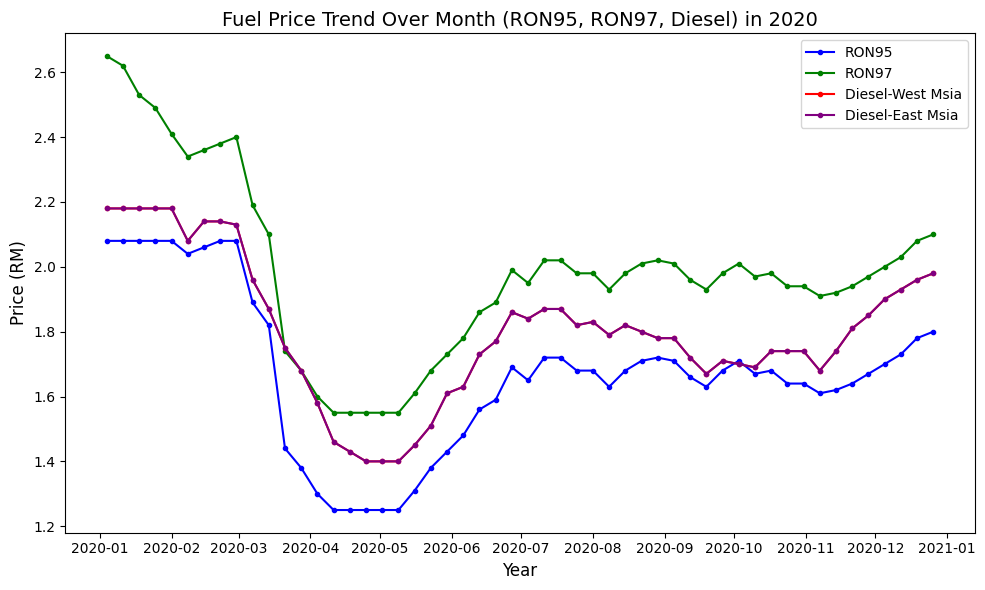

In [29]:
# Plotting the price trends
plt.figure(figsize=(10, 6))

# Plotting RON95, RON97, and Diesel prices
plt.plot(df_filtered['date'], df_filtered['ron95'], label='RON95', marker='.', color='blue')
plt.plot(df_filtered['date'], df_filtered['ron97'], label='RON97', marker='.', color='green')
plt.plot(df_filtered['date'], df_filtered['diesel'], label='Diesel-West Msia', marker='.', color='red')
plt.plot(df_filtered['date'], df_filtered['diesel_eastmsia'], label='Diesel-East Msia', marker='.', color='purple')

# Adding title and labels
plt.title('Fuel Price Trend Over Month (RON95, RON97, Diesel) in 2020', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)

# Adding a legend
plt.legend() # using a size in points

import matplotlib.dates as mdates
# Formatting the x-axis to avoid overlap
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date

# Rotating date labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Conclusion:

* The significant drop in fuel prices around April can be attributed to some external factors such as global oil prices due to COVID-19 pandemic. The demand for fuel decreased drastically, leading to lower prices.
* Post-May, there's a increase in prices suggests a recovery as restictions eased and demand for fuel started to pick up.
* The price trends for diesel in East Malaysia mirrored those in West Malaysia, strating and ending at similar levels. This indicates that there wasn't a significant difference in price trends between this 2 regions for diesel during this year (2020).

### Weekly Price Fluctuations: What are the weekly changes in prices for RON95, RON97 and diesel over time?

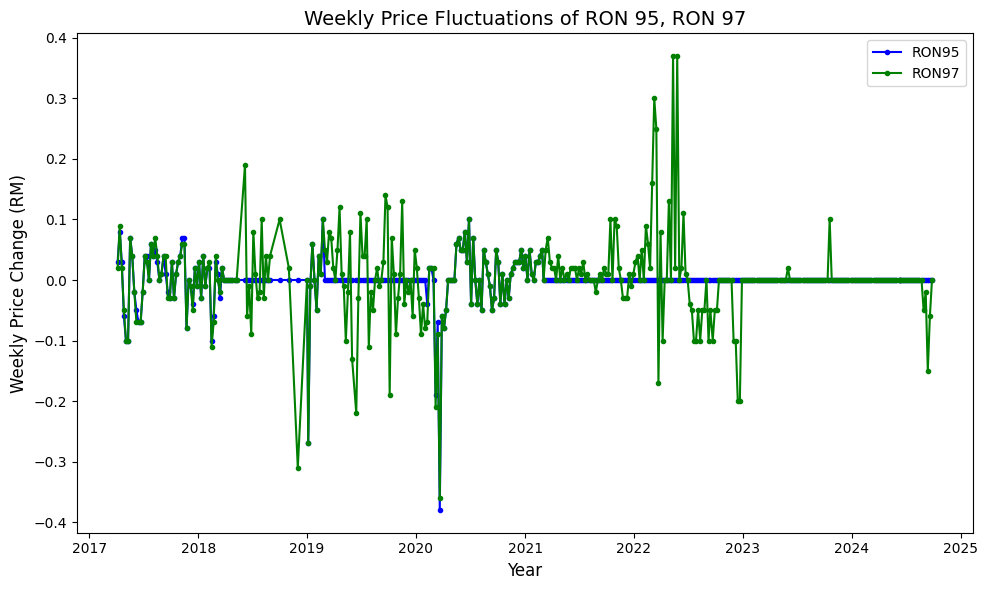

In [31]:
# Plotting the price trends
plt.figure(figsize=(10, 6))

# Plotting RON95, RON97, and Diesel prices
plt.plot(fuelprice_df_weekly_change['date'], fuelprice_df_weekly_change['ron95'], label='RON95', marker='.', color='blue')
plt.plot(fuelprice_df_weekly_change['date'], fuelprice_df_weekly_change['ron97'], label='RON97', marker='.', color='green')

# Adding title and labels
plt.title('Weekly Price Fluctuations of RON 95, RON 97', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Weekly Price Change (RM)', fontsize=12)

# Adding a legend
plt.legend() # using a size in points

# Rotating date labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

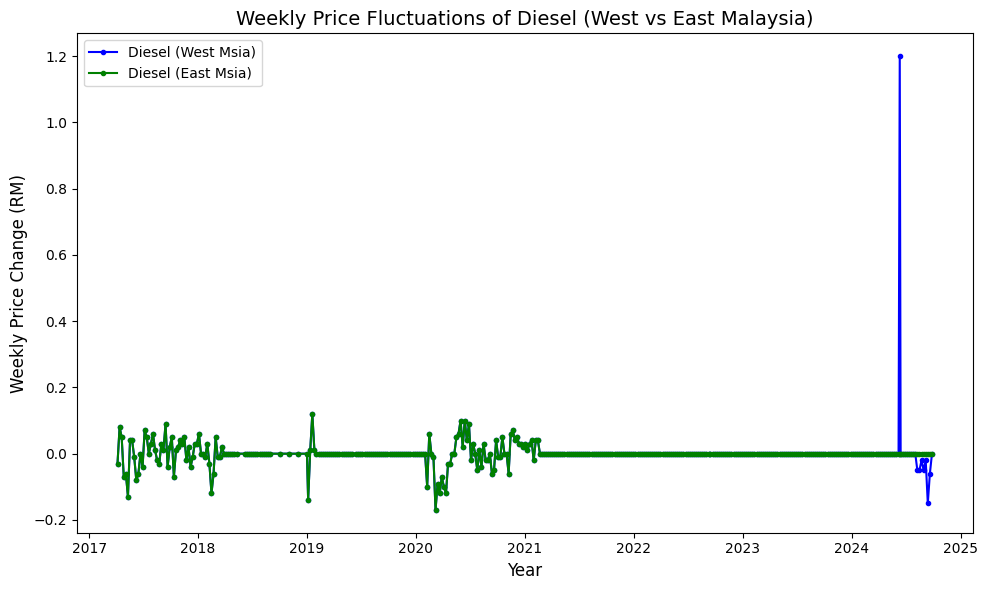

In [32]:
# Plotting the price trends
plt.figure(figsize=(10, 6))

# Plotting RON95, RON97, and Diesel prices
plt.plot(fuelprice_df_weekly_change['date'], fuelprice_df_weekly_change['diesel'], label='Diesel (West Msia)', marker='.', color='blue')
plt.plot(fuelprice_df_weekly_change['date'], fuelprice_df_weekly_change['diesel_eastmsia'], label='Diesel (East Msia)', marker='.', color='green')

# Adding title and labels
plt.title('Weekly Price Fluctuations of Diesel (West vs East Malaysia)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Weekly Price Change (RM)', fontsize=12)

# Adding a legend
plt.legend() # using a size in points

# Rotating date labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
# Calculate weekly changes (example structure)
weekly_changes = fuelprice_df_weekly_change[['date', 'ron95', 'ron97', 'diesel', 'diesel_eastmsia']]

# Set a threshold for significant changes
threshold_increase = 0.30
threshold_decrease = -0.30

# Find significant increases
significant_increases = weekly_changes[(weekly_changes['ron95'] > threshold_increase) |
                                       (weekly_changes['ron97'] > threshold_increase) |
                                       (weekly_changes['diesel'] > threshold_increase) |
                                       (weekly_changes['diesel_eastmsia'] > threshold_increase)]

# Find significant decreases
significant_decreases = weekly_changes[(weekly_changes['ron95'] < threshold_decrease) |
                                       (weekly_changes['ron97'] < threshold_decrease) |
                                       (weekly_changes['diesel'] < threshold_decrease)|
                                       (weekly_changes['diesel_eastmsia'] < threshold_decrease)]

# Display the results in table format
print("Significant Increases:")
print(significant_increases.to_string(index=False))

print("\nSignificant Decreases:")
print(significant_decreases.to_string(index=False))

Significant Increases:
      date  ron95  ron97  diesel  diesel_eastmsia
2022-05-12    0.0   0.37     0.0              0.0
2022-05-26    0.0   0.37     0.0              0.0
2024-06-10    0.0   0.00     1.2              0.0

Significant Decreases:
      date  ron95  ron97  diesel  diesel_eastmsia
2018-12-01   0.00  -0.31    0.00             0.00
2020-03-21  -0.38  -0.36   -0.12            -0.12


### RON97 vs RON95 Comparison: How do the prices of RON97 and RON95 compare over time?

### Regional Diesel Price Comparison: How do diesel prices differ between Peninsular Malaysia and East Malaysia?

### Highest and Lowest Price Points: When were the highest and lowest prices for RON95, RON97, and diesel recorded?

### Cumulative Price Change: What is the cumulative price change for each fuel type (RON95, RON97, diesel) over the entire time period?

## Forecast fuel price in next 90 days

Forecasted RON95 prices for the next 90 days:
376    2.05
377    2.05
378    2.05
379    2.05
380    2.05
       ... 
461    2.05
462    2.05
463    2.05
464    2.05
465    2.05
Name: predicted_mean, Length: 90, dtype: float64


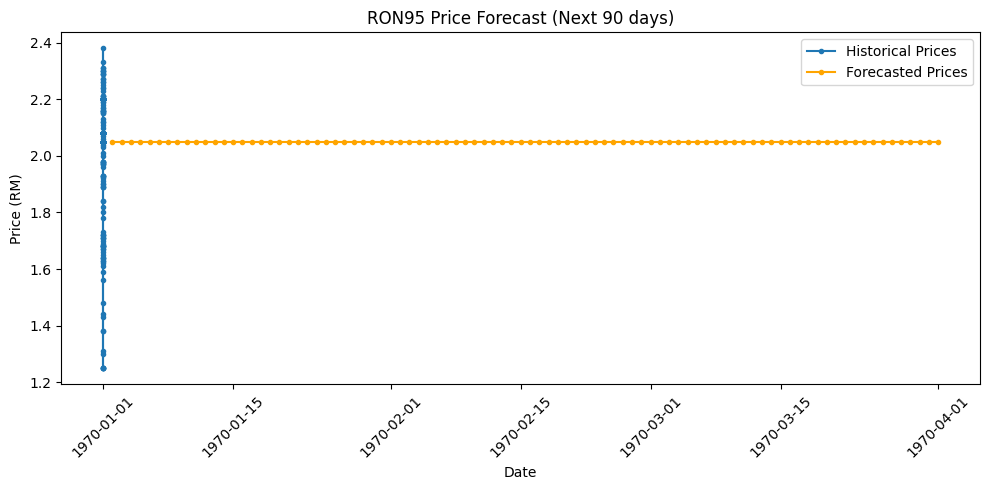

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(fuelprice_df_level['ron95'], order=(1, 1, 1))  # Adjust order based on your analysis
model_fit = model.fit()

# Forecast for the next 90 days
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=fuelprice_df_level.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Display the forecasted values
print("Forecasted RON95 prices for the next 90 days:")
print(forecast)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(fuelprice_df_level.index, fuelprice_df_level['ron95'], label='Historical Prices', marker='.')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='orange', marker='.')
plt.title('RON95 Price Forecast (Next 90 days)')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


Forecasted RON97 prices for the next 90 days:
1970-01-01 00:00:00.000000376    3.174147
1970-01-01 00:00:00.000000377    3.162764
1970-01-01 00:00:00.000000378    3.154592
1970-01-01 00:00:00.000000379    3.148724
1970-01-01 00:00:00.000000380    3.144512
                                   ...   
1970-01-01 00:00:00.000000461    3.133787
1970-01-01 00:00:00.000000462    3.133787
1970-01-01 00:00:00.000000463    3.133787
1970-01-01 00:00:00.000000464    3.133787
1970-01-01 00:00:00.000000465    3.133787
Freq: N, Name: predicted_mean, Length: 90, dtype: float64


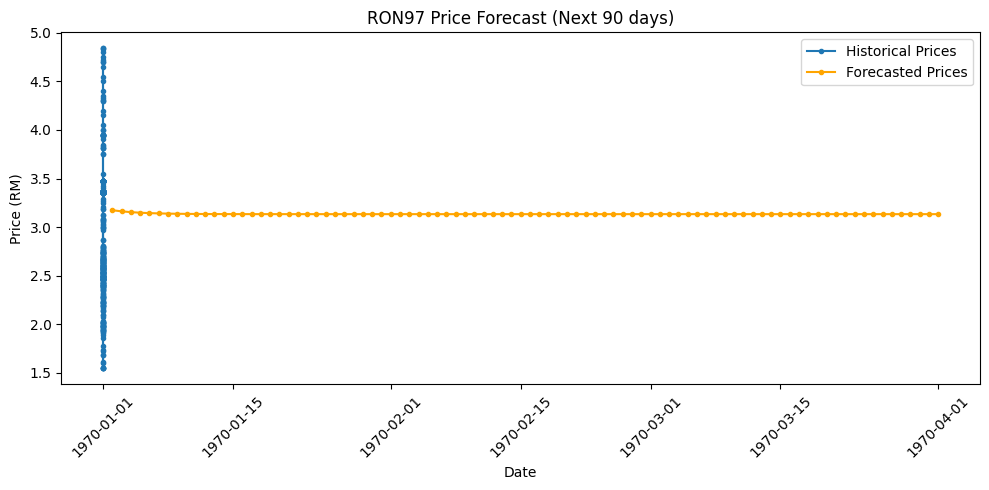

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(fuelprice_df_level['ron97'], order=(1, 1, 1))  # Adjust order based on your analysis
model_fit = model.fit()

# Forecast for the next 90 days
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=fuelprice_df_level.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Display the forecasted values
print("Forecasted RON97 prices for the next 90 days:")
print(forecast)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(fuelprice_df_level.index, fuelprice_df_level['ron97'], label='Historical Prices', marker='.')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='orange', marker='.')
plt.title('RON97 Price Forecast (Next 90 days)')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

ARIMA Overview

* Purpose: ARIMA is used for forecasting future points in a time series based on its past values.

* Components:
  * AR (AutoRegressive): Uses the dependency between an observation and a number of lagged observations (previous values).
  * I (Integrated): Represents the differencing of raw observations to make the time series stationary (removing trends and seasonality).
  * MA (Moving Average): Uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Classification

* Type: ARIMA is considered a statistical model rather than a machine learning model. It falls under the umbrella of traditional statistical forecasting methods.

* Applications: It is commonly used in economic and financial time series data, sales forecasting, and other domains where data is indexed in time order.

Key Characteristics
* Stationarity: ARIMA requires the time series data to be stationary, meaning its statistical properties do not change over time.

* Parameterization: The model is defined by three parameters: (p, d, q), where:
  * p is the number of lag observations (AR terms).
  * d is the number of times that the raw observations are differenced (I term).
  * q is the size of the moving average window (MA terms).

Conclusion

While ARIMA models can be used for forecasting similar to machine learning models, they are based on statistical principles and are specifically designed for time series data. For machine learning applications, models like decision trees, neural networks, and support vector machines are more commonly employed for various predictive tasks.